0    12239.000000
1     6706.618017
2     6706.618017
3     6706.618017
4     6706.618017
5     6706.618017
6     6706.618017
7     6706.618017
8     7253.000000
9     2969.000000
Name: Cabin, dtype: float64
   Survived  Pclass   Name  Sex        Age  SibSp  Parch         Cabin  \
0         1       1  60779   10  38.355472      2      0  12239.000000   
1         0       3  10326   10  38.355472      0      0   6706.618017   
2         0       3  61903   10   0.330000      1      2   6706.618017   
3         0       3  45334   10  19.000000      0      0   6706.618017   
4         1       3   7650   10  25.000000      0      0   6706.618017   
5         0       2  73247   10  35.000000      0      0   6706.618017   
6         0       3  16645   10   7.000000      0      0   6706.618017   
7         1       3  87980   20   6.000000      1      2   6706.618017   
8         0       1  86694   10  27.000000      2      1   7253.000000   
9         0       2  32141   10  66.000000      0   

[0.76665 0.7685  0.7689  0.76745 0.7687 ]
Train Index:  [    1     2     3 ... 99997 99998 99999] 

Test Index:  [    0     9    11 ... 99986 99988 99992]
[LightGBM] [Warning] boosting is set with boosting_type=gbdt, will be overridden by boost=dart. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] Unknown parameter: lambda_li
[LightGBM] [Warning] Unknown parameter: early_stoppping_round
[LightGBM] [Warning] min_gain_to_split is set=4, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] boosting is set with boosting_type=g

[LightGBM] [Warning] boosting is set with boosting_type=gbdt, will be overridden by boost=dart. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] Unknown parameter: lambda_li
[LightGBM] [Warning] Unknown parameter: early_stoppping_round
[LightGBM] [Warning] min_gain_to_split is set=4, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] boosting is set with boosting_type=gbdt, will be overridden by boost=dart. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown p

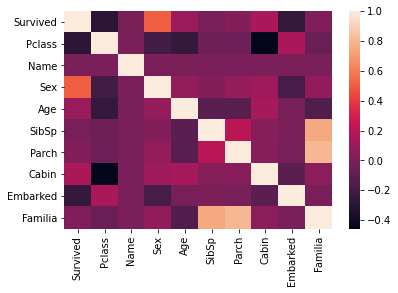

In [54]:
#trying out boosting algorithms val_score with the  cabin feature the best
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import pyforest
import warnings
import re
warnings.filterwarnings("ignore")
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold,RandomizedSearchCV,train_test_split,cross_val_score
import lightgbm as lgb


#load the required datasets
df = pd.read_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\train.csv')
##initialize the label encoder class
labelencoder=LabelEncoder()

##write out the regex validator
num_regex='\d+'
regex_compile = re.compile(num_regex)
##drop certain columns
df.drop(['PassengerId','Ticket','Fare'],axis=1,inplace=True)
#make extra new features
df['Familia'] = df['SibSp'] + df['Parch']

##convert certain categorical data to numerical data
df['Sex'].replace('male',10,inplace=True)
df['Sex'].replace('female',20,inplace=True)
df['Embarked'].replace('C',50,inplace=True)
df['Embarked'].replace('S',60,inplace=True)
df['Embarked'].replace('Q',70,inplace=True)

##strip special characters from each Name column instances
df['Name'] = df['Name'].apply(lambda x:''.join([x for c in x if c.isalnum()]))
# df_test['Cabin'] = df_test['Cabin'].apply(lambda x : ''.join([i for i in str(x) if i.isalnum()]))
df['Cabin'] = df['Cabin'].astype('str').apply(lambda x :''.join(regex_compile.findall(x)))
df['Cabin'].replace('','0',inplace=True)
df['Cabin'] =  df['Cabin'].astype('int64')
df['Cabin'].replace(0, np.std(df['Cabin']),inplace=True)
#label encode the name columns
df['Name'] = labelencoder.fit_transform(df['Name'])
print(df['Cabin'].head(10))

int_columns = ['Age','Embarked']
##perform imputation on missing values with a numerical mean value
for col in int_columns:
  df[col].fillna(np.mean(df[col]),inplace=True)
print(df.head(10))
##theh fare column seems to be an outlier
sns.heatmap(df.corr())

##scale the data to become a normal distribution
X = df.drop(['Survived'],axis=1)
Y = df['Survived']
stdscale = StandardScaler()


X = pd.DataFrame(stdscale.fit_transform(X),columns=X.columns)

##using the lgbm
lgb_clf = lgb.LGBMClassifier(extra_trees=True,boost='dart',path_smooth =2,num_leaves = 70,num_iterations= 200, min_samples_leaf= 300, min_gain_to_split=4, max_depth=10, max_bins =200,
                             learning_rate = 0.1, lambda_li = 5, lambda_l2 = 4, early_stoppping_round= 40, bagging_freq= 4, bagging_fraction= 0.7)


#load the test set
df_test = pd.read_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\test.csv')
##convert certain categorical data to numerical data

df_test.drop(['PassengerId','Ticket','Fare'],axis=1,inplace=True)

df_test['Familia'] = df_test['SibSp'] + df_test['Parch']

##convert certain categorical data to numerical data
df_test['Sex'].replace('male',10,inplace=True)
df_test['Sex'].replace('female',20,inplace=True)
df_test['Embarked'].replace('C',50,inplace=True)
df_test['Embarked'].replace('S',60,inplace=True)
df_test['Embarked'].replace('Q',70,inplace=True)


##strip special characters from each Name column instances
df_test['Name'] = df_test['Name'].apply(lambda x:''.join([x for c in x if c.isalnum()]))
# df_test['Cabin'] = df_test['Cabin'].apply(lambda x : ''.join([i for i in str(x) if i.isalnum()]))
df_test['Cabin'] = df_test['Cabin'].astype('str').apply(lambda x :''.join(regex_compile.findall(x)))
df_test['Cabin'].replace('','0',inplace=True)
df_test['Cabin'] =  df_test['Cabin'].astype('int64')
df_test['Cabin'].replace(0, np.std(df_test['Cabin']),inplace=True)
print(df_test['Cabin'].head())
#label encode the name columns
df_test['Name'] = labelencoder.fit_transform(df_test['Name'])

##perform imputation on missing values with a numerical mean value
for col in int_columns:
  df_test[col].fillna(np.mean(df_test[col]),inplace=True)

##scale the test dataset
A = stdscale.fit_transform(df_test)


##using the kfold cross validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]
    lgb_clf.fit(X_train, Y_train)
    print(cross_val_score(lgb_clf, X, Y, cv=5))

    
lgb_clf.fit(X,Y)

pred = lgb_clf.predict(A)
##get the first ten predicted values
print(pred[:10])
##fill in the pred values in the submission csv file
sample_submission = pd.read_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\sample_submission.csv')
sample_submission['Survived'] = pred
sample_submission.to_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\firstsubmit.csv',index=False)

0    12239.00000
1     4035.65663
2     4035.65663
3     4035.65663
4     4035.65663
5     4035.65663
6     4035.65663
7     4035.65663
8     7253.00000
9     2969.00000
Name: Cabin, dtype: float64
   Survived  Pclass   Name  Sex        Age  SibSp  Parch        Cabin  \
0         1       1  60779   10  38.355472      2      0  12239.00000   
1         0       3  10326   10  38.355472      0      0   4035.65663   
2         0       3  61903   10   0.330000      1      2   4035.65663   
3         0       3  45334   10  19.000000      0      0   4035.65663   
4         1       3   7650   10  25.000000      0      0   4035.65663   
5         0       2  73247   10  35.000000      0      0   4035.65663   
6         0       3  16645   10   7.000000      0      0   4035.65663   
7         1       3  87980   20   6.000000      1      2   4035.65663   
8         0       1  86694   10  27.000000      2      1   7253.00000   
9         0       2  32141   10  66.000000      0      0   2969.00000   

[LightGBM] [Warning] boosting is set with boosting_type=gbdt, will be overridden by boost=dart. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] Unknown parameter: lambda_li
[LightGBM] [Warning] Unknown parameter: early_stoppping_round
[LightGBM] [Warning] min_gain_to_split is set=4, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[0.76715 0.76875 0.76865 0.767   0.76905]
Train Index:  [    1     2     3 ... 99997 99998 99999] 

Test Index:  [    0     9    11 ... 99986 99988 99992]
[LightGBM] [Warning] boosting is set with boosting_type=g

[0.76715 0.76875 0.76865 0.767   0.76905]
Train Index:  [    0     1     3 ... 99996 99998 99999] 

Test Index:  [    2     5    15 ... 99990 99995 99997]
[LightGBM] [Warning] boosting is set with boosting_type=gbdt, will be overridden by boost=dart. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: max_bins
[LightGBM] [Warning] Unknown parameter: lambda_li
[LightGBM] [Warning] Unknown parameter: early_stoppping_round
[LightGBM] [Warning] min_gain_to_split is set=4, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] boosting is set with boosting_type=g

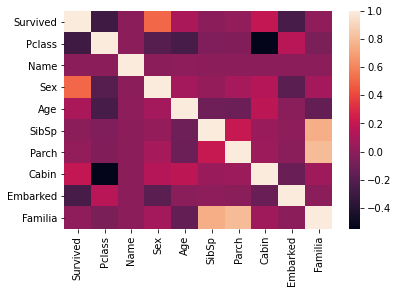

In [57]:
#trying out boosting algorithms val_score with the  cabin feature the best
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import pyforest
import warnings
import re
warnings.filterwarnings("ignore")
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold,RandomizedSearchCV,train_test_split,cross_val_score
import lightgbm as lgb


#load the required datasets
df = pd.read_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\train.csv')
##initialize the label encoder class
labelencoder=LabelEncoder()

##write out the regex validator
num_regex='\d+'
regex_compile = re.compile(num_regex)
##drop certain columns
df.drop(['PassengerId','Ticket','Fare'],axis=1,inplace=True)
#make extra new features
df['Familia'] = df['SibSp'] + df['Parch']

##convert certain categorical data to numerical data
df['Sex'].replace('male',10,inplace=True)
df['Sex'].replace('female',20,inplace=True)
df['Embarked'].replace('C',50,inplace=True)
df['Embarked'].replace('S',60,inplace=True)
df['Embarked'].replace('Q',70,inplace=True)

##strip special characters from each Name column instances
df['Name'] = df['Name'].apply(lambda x:''.join([x for c in x if c.isalnum()]))
# df_test['Cabin'] = df_test['Cabin'].apply(lambda x : ''.join([i for i in str(x) if i.isalnum()]))
df['Cabin'] = df['Cabin'].astype('str').apply(lambda x :''.join(regex_compile.findall(x)))
df['Cabin'].replace('','0',inplace=True)
df['Cabin'] =  df['Cabin'].astype('int64')
df['Cabin'].replace(0, np.mean(df['Cabin']),inplace=True)
#label encode the name columns
df['Name'] = labelencoder.fit_transform(df['Name'])
print(df['Cabin'].head(10))

int_columns = ['Age','Embarked']
##perform imputation on missing values with a numerical mean value
for col in int_columns:
  df[col].fillna(np.mean(df[col]),inplace=True)
print(df.head(10))
##theh fare column seems to be an outlier
sns.heatmap(df.corr())

##scale the data to become a normal distribution
X = df.drop(['Survived'],axis=1)
Y = df['Survived']
stdscale = StandardScaler()


X = pd.DataFrame(stdscale.fit_transform(X),columns=X.columns)

##using the lgbm
lgb_clf = lgb.LGBMClassifier(extra_trees=True,boost='dart',path_smooth =2,num_leaves = 80,num_iterations= 400, min_samples_leaf= 300, min_gain_to_split=4, max_depth=20, max_bins =200,
                             learning_rate = 0.05, lambda_li = 5, lambda_l2 = 4, early_stoppping_round= 80, bagging_freq= 8, bagging_fraction= 0.8)


#load the test set
df_test = pd.read_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\test.csv')
##convert certain categorical data to numerical data

df_test.drop(['PassengerId','Ticket','Fare'],axis=1,inplace=True)

df_test['Familia'] = df_test['SibSp'] + df_test['Parch']

##convert certain categorical data to numerical data
df_test['Sex'].replace('male',10,inplace=True)
df_test['Sex'].replace('female',20,inplace=True)
df_test['Embarked'].replace('C',50,inplace=True)
df_test['Embarked'].replace('S',60,inplace=True)
df_test['Embarked'].replace('Q',70,inplace=True)


##strip special characters from each Name column instances
df_test['Name'] = df_test['Name'].apply(lambda x:''.join([x for c in x if c.isalnum()]))
# df_test['Cabin'] = df_test['Cabin'].apply(lambda x : ''.join([i for i in str(x) if i.isalnum()]))
df_test['Cabin'] = df_test['Cabin'].astype('str').apply(lambda x :''.join(regex_compile.findall(x)))
df_test['Cabin'].replace('','0',inplace=True)
df_test['Cabin'] =  df_test['Cabin'].astype('int64')
df_test['Cabin'].replace(0, np.mean(df_test['Cabin']),inplace=True)
print(df_test['Cabin'].head())
#label encode the name columns
df_test['Name'] = labelencoder.fit_transform(df_test['Name'])

##perform imputation on missing values with a numerical mean value
for col in int_columns:
  df_test[col].fillna(np.mean(df_test[col]),inplace=True)

##scale the test dataset
A = stdscale.fit_transform(df_test)


##using the kfold cross validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, Y_train, Y_test = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]
    lgb_clf.fit(X_train, Y_train)
    print(cross_val_score(lgb_clf, X, Y, cv=5))

    
lgb_clf.fit(X,Y)

pred = lgb_clf.predict(A)
##get the first ten predicted values
print(pred[:10])
##fill in the pred values in the submission csv file
sample_submission = pd.read_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\sample_submission.csv')
sample_submission['Survived'] = pred
sample_submission.to_csv(r'C:\Users\USER\kagglesync\tabular-playground-series-apr-2021\secondsubmit.csv',index=False)